3.12.7


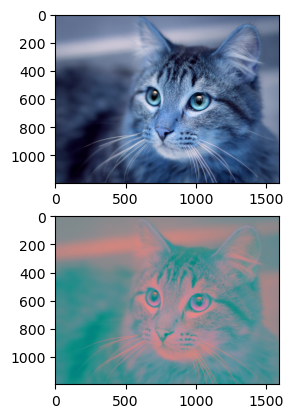

In [97]:
import cv2
import matplotlib.pyplot as plt
from platform import python_version
print(python_version())
image = cv2.imread('chat.jpg')
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
plt.subplot(211)
plt.imshow(image)
plt.subplot(212)
plt.imshow(lab_image)
plt.show()

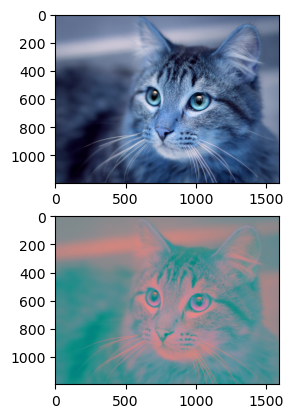

In [99]:
import cv2

image = cv2.imread('chat.jpg')
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
plt.subplot(211)
plt.imshow(image)
plt.subplot(212)
plt.imshow(lab_image)
plt.show()


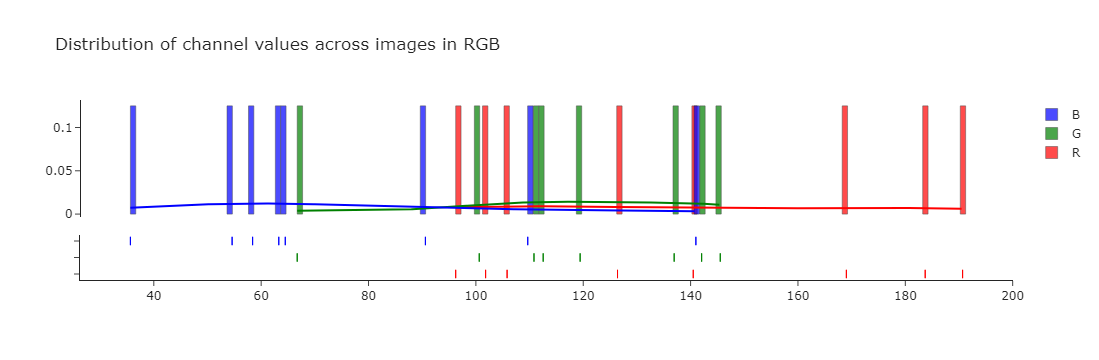

In [101]:
import cv2

import numpy as np
import plotly.figure_factory as ff

import glob

folder_path = r"C:\Users\abdel\OneDrive\Documents\TP\Dataset\*"  # Replace with the actual path to your "Dataset" folder

# Load images from the specified folder
images = [cv2.imread(file) for file in glob.glob(f"{folder_path}*.jpg")]
len(images)

# Check the distribution of red values 
red_values = []
for i in range(len(images)):
  red_value = np.mean(images[i][:, :, 0])
  red_values.append(red_value)

# Check the distribution of green values 
green_values = []
for i in range(len(images)):
  green_value = np.mean(images[i][:, :, 1])
  green_values.append(green_value)

# Check the distribution of blue values 
blue_values = []
for i in range(len(images)):
  blue_value = np.mean(images[i][:, :, 2])
  blue_values.append(blue_value)
  
# Plotting the histogram
fig = ff.create_distplot([red_values, green_values, blue_values], group_labels=["R", "G", "B"], colors=['red', 'green', 'blue'])
fig.update_layout(showlegend=True, template="simple_white")
fig.update_layout(title_text='Distribution of channel values across images in RGB')
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig.data[1].marker.line.color = 'rgb(0, 0, 0)'
fig.data[1].marker.line.width = 0.5
fig.data[2].marker.line.color = 'rgb(0, 0, 0)'
fig.data[2].marker.line.width = 0.5
fig

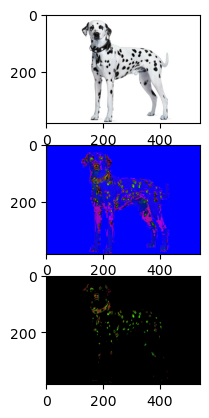

In [103]:
import cv2


# Reading the original image
image_spot = cv2.imread('dalmatien2.jpg')
plt.subplot(311)
plt.imshow(image_spot)

# Converting it to HSV color space
hsv_image_spot = cv2.cvtColor(image_spot, cv2.COLOR_BGR2HSV)
plt.subplot(312)
plt.imshow(hsv_image_spot)

# Setting the black pixel mask and perform bitwise_and to get only the black pixels
mask = cv2.inRange(hsv_image_spot, (0, 0, 0), (180, 255, 40))
masked = cv2.bitwise_and(hsv_image_spot, hsv_image_spot, mask=mask)
plt.subplot(313)
plt.imshow(masked)
plt.show()

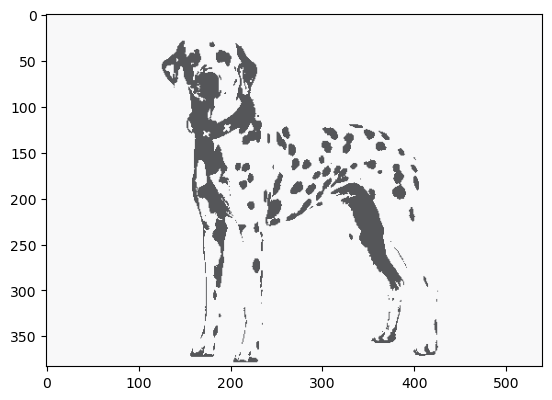

In [105]:
import cv2

image_spot_reshaped = image_spot.reshape((image_spot.shape[0] * image_spot.shape[1], 3))

# convert to np.float32
Z = np.float32(image_spot_reshaped)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image_spot.shape))

plt.imshow(res2)
plt.show()

In [108]:
import cv2
import numpy as np
import glob
import os
import pandas as pd

print(f"taille de la liste: {len(images)}")

features = []
for file, img in zip(glob.glob(f"{folder_path}*.jpg"), images):
    height, width, _ = img.shape
    mean_b = np.mean(img[:, :, 0])
    mean_g = np.mean(img[:, :, 1])
    mean_r = np.mean(img[:, :, 2])

    std_b = np.std(img[:, :, 0])
    std_g = np.std(img[:, :, 1])
    std_r = np.std(img[:, :, 2])

  
    features.append([
        os.path.basename(file), 
        height,  
        width,   
        mean_r,  
        mean_g, 
        mean_b, 
        std_r,   
        std_g,   
        std_b    
    ])

# Create DataFrame with proper column names
df = pd.DataFrame(features, columns=[
    'Filename', 'Height', 'Width', 'Mean_R', 'Mean_G', 'Mean_B',
    'Std_R', 'Std_G', 'Std_B'
])

# Save the DataFrame to a CSV file
output_csv_path = r"C:\Users\abdel\OneDrive\Documents\TP\features_matrix.csv" 
df.to_csv(output_csv_path, index=False)

print(f"Features matrix saved to {output_csv_path}")


taille de la liste: 16
Features matrix saved to C:\Users\abdel\OneDrive\Documents\TP\features_matrix.csv


In [110]:
import cv2
import numpy as np
from skimage import feature

# Load the image
image_spot = cv2.imread('poisson.jpg')
gray = cv2.cvtColor(image_spot, cv2.COLOR_BGR2GRAY)

# Find the GLCM
graycom = feature.graycomatrix(gray, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)

# Find the GLCM properties
contrast = feature.graycoprops(graycom, 'contrast')
dissimilarity = feature.graycoprops(graycom, 'dissimilarity')
homogeneity = feature.graycoprops(graycom, 'homogeneity')
energy = feature.graycoprops(graycom, 'energy')
correlation = feature.graycoprops(graycom, 'correlation')
ASM = feature.graycoprops(graycom, 'ASM')

print("Contrast: {}".format(contrast))
print("Dissimilarity: {}".format(dissimilarity))
print("Homogeneity: {}".format(homogeneity))
print("Energy: {}".format(energy))
print("Correlation: {}".format(correlation))
print("ASM: {}".format(ASM))


Contrast: [[15.5576228  26.94734795 11.6406221  25.4486747 ]]
Dissimilarity: [[2.48405931 3.28981855 2.0750753  3.20343736]]
Homogeneity: [[0.40881974 0.33607345 0.45145273 0.33834247]]
Energy: [[0.03214634 0.02777054 0.03469193 0.02804844]]
Correlation: [[0.99344767 0.98864244 0.99510321 0.9892784 ]]
ASM: [[0.00103339 0.0007712  0.00120353 0.00078672]]


In [112]:
import cv2
import numpy as np
from skimage import feature
import pandas as pd
import glob
import os

features = []
image_names = []

# Chemin des images
image_paths = glob.glob(r"C:\Users\abdel\OneDrive\Documents\TP\Dataset\*.jpg")  # Modifier l'extension si nécessaire

for path in image_paths:
    img = cv2.imread(path)  # Lire l'image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    if img is not None:
        # Redimensionner pour uniformiser (facultatif)
        img_resized = cv2.resize(img, (100, 100))
        
        # Calculer la matrice GLCM
        graycom = feature.graycomatrix(gray, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)
        
        # Calcul des propriétés de la GLCM
        contrast = feature.graycoprops(graycom, 'contrast')
        dissimilarity = feature.graycoprops(graycom, 'dissimilarity')
        homogeneity = feature.graycoprops(graycom, 'homogeneity')
        energy = feature.graycoprops(graycom, 'energy')
        correlation = feature.graycoprops(graycom, 'correlation')
        ASM = feature.graycoprops(graycom, 'ASM')
        
        # Ajouter les caractéristiques extraites à la liste
        features.append([
            contrast.mean(),
            dissimilarity.mean(),
            homogeneity.mean(),
            energy.mean(),
            correlation.mean(),
            ASM.mean()
        ])
        
        # Récupérer uniquement le nom du fichier (pas le chemin complet)
        image_name = os.path.basename(path)  # Correction ici avec os.path.basename
        image_names.append(image_name)

# Créer un DataFrame avec les caractéristiques
columns = ["contrast", "dissimilarity", "homogeneity", "energy", "correlation", "ASM"]
df = pd.DataFrame(features, index=image_names, columns=columns)

# Enregistrer dans un fichier CSV
df.to_csv("glcm_matrix.csv", index_label="Image_Name")
print("Matrice de caractéristiques enregistrée dans 'glcm_matrix.csv'")


Matrice de caractéristiques enregistrée dans 'glcm_matrix.csv'


Histogram of Local Binary Pattern value: [0.04093473 0.01631842 0.01946191 0.02133413 0.01971038 0.01980284
 0.01878583 0.02005709 0.0212359  0.02532128 0.02940667 0.03961723
 0.04306121 0.03962301 0.02863813 0.02362241 0.01876271 0.01825999
 0.01561344 0.01638776 0.01724297 0.01905164 0.01925388 0.0176648
 0.03694758 0.39388406]


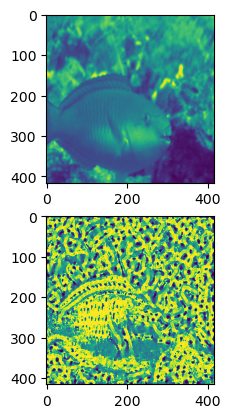

In [113]:
import cv2
import matplotlib.pyplot as plt

class LocalBinaryPatterns:
  def __init__(self, numPoints, radius):
    self.numPoints = numPoints
    self.radius = radius

  def describe(self, image, eps = 1e-7):
    lbp = feature.local_binary_pattern(image, self.numPoints, self.radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, self.numPoints+3), range=(0, self.numPoints + 2))

    # Normalize the histogram
    hist = hist.astype('float')
    hist /= (hist.sum() + eps)

    return hist, lbp

image = cv2.imread('poisson.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
desc = LocalBinaryPatterns(24, 8)
hist, lbp = desc.describe(gray)
print("Histogram of Local Binary Pattern value: {}".format(hist))

contrast = contrast.flatten()
dissimilarity = dissimilarity.flatten()
homogeneity = homogeneity.flatten()
energy = energy.flatten()
correlation = correlation.flatten()
ASM = ASM.flatten()
hist = hist.flatten()

features = np.concatenate((contrast, dissimilarity, homogeneity, energy, correlation, ASM, hist), axis=0) 
plt.subplot(211)
plt.imshow(gray)
plt.subplot(212)
plt.imshow(lbp)
plt.show()

In [116]:
import cv2
import numpy as np
import pandas as pd
import glob
import os
from skimage.feature import local_binary_pattern

# Path to the folder containing the images
folder_path = r"C:\Users\abdel\OneDrive\Documents\TP\Dataset\*"  # Modify path as needed

# List to store the feature vectors
features_list = []
image_names = []

# Parameters for LBP
radius = 1  # Radius for LBP calculation
n_points = 8 * radius  # Number of points for LBP calculation

# Loop through all the images in the folder
for path in glob.glob(folder_path):
    print(f"Processing image: {path}")
    
    img = cv2.imread(path)  # Read the image
    if img is None:
        print(f"Error loading image: {path}")
        continue
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Compute the Local Binary Pattern (LBP) image
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
    
    # Compute the histogram of the LBP
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    
    # Normalize the histogram
    lbp_hist = lbp_hist.astype('float')
    lbp_hist /= (lbp_hist.sum() + 1e-6)  # Normalize to sum to 1

    # Add the histogram as a feature vector for the image
    features_list.append(lbp_hist)
    
    # Get the image name
    image_name = os.path.basename(path)
    image_names.append(image_name)

# Create a DataFrame to hold the features
df = pd.DataFrame(features_list, index=image_names, columns=[f"LBP_{i}" for i in range(len(lbp_hist))])

# Save the DataFrame to a CSV file
output_csv_path = r"C:\Users\abdel\OneDrive\Documents\TP\lbp_features_matrix.csv"  # Modify path as needed
df.to_csv(output_csv_path, index_label="Image_Name")

print(f"Features matrix saved to {output_csv_path}")


Processing image: C:\Users\abdel\OneDrive\Documents\TP\Dataset\FishDataset10_png.rf.b75ef7ecce9a4184db0c8220e9563c47.jpg
Processing image: C:\Users\abdel\OneDrive\Documents\TP\Dataset\FishDataset10_png.rf.YrG2llaKk0GnMJOVoUur.jpg
Processing image: C:\Users\abdel\OneDrive\Documents\TP\Dataset\FishDataset13_png.rf.49a8aeb21de7c04cbdbd6d04527d8a04.jpg
Processing image: C:\Users\abdel\OneDrive\Documents\TP\Dataset\FishDataset13_png.rf.sBagrbtqlG7fZwcbwbLI.jpg
Processing image: C:\Users\abdel\OneDrive\Documents\TP\Dataset\FishDataset15_png.rf.d43edd57fb7f6dd7f5df92498074b522.jpg
Processing image: C:\Users\abdel\OneDrive\Documents\TP\Dataset\FishDataset15_png.rf.UQUeuLMEmpSTnUBtDb5w.jpg
Processing image: C:\Users\abdel\OneDrive\Documents\TP\Dataset\FishDataset16_png.rf.245c862fe003757c6118dc78116129c5.jpg
Processing image: C:\Users\abdel\OneDrive\Documents\TP\Dataset\FishDataset16_png.rf.6XYzFTiturbjfeEQ3UsQ.jpg
Processing image: C:\Users\abdel\OneDrive\Documents\TP\Dataset\FishDataset21_png